In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import classification_report

df = pd.read_excel("titanic.xls")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
print(np.any(df.isna()))           #Check for null values

null_values = []
for column in df.columns.values:
    null_values.append(df[column].isnull().sum())
    
print(null_values)                 #Print number of null values in each column
df.fillna(0, inplace=True)
df.drop(columns=['body', 'pclass', 'name', 'embarked', 'home.dest'], axis=1, inplace=True)
print(np.any(df.isna()))

True
[0, 0, 0, 0, 263, 0, 0, 0, 1, 1014, 2, 823, 1188, 564]
False


In [3]:
#Function to handle non-numeric data
def non_numeric_data(df):
    
    columns = df.columns.values
    text_numeric = []
    
    for column in columns:
        text_numeric_values = {}
        def convert_to_numeric(val):
            return text_numeric_values[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values
            unique_elements = set(column_contents)
            x = 0
            
            for unique in unique_elements:
                if unique not in text_numeric_values:
                    text_numeric_values[unique] = x
                    x += 1
            
            
            df[column] = list(map(convert_to_numeric, df[column]))
        text_numeric.append(text_numeric_values)        
    return df, text_numeric

df, text_numeric = non_numeric_data(df)

print(text_numeric[1])          #Example dictionary

{'male': 0, 'female': 1}


In [4]:
X = np.array(df.drop(['survived'], axis=1)).astype(float)
X = preprocessing.scale(X)
y = np.array(df['survived'])

In [5]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2)
clf.fit(X, y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
def get_predictions(X, y):
    predictions = []
    correct = 0
    for i in range(len(X)):
        test = np.array(X[i].astype(float))
        test = test.reshape(-1, len(test))
        prediction = clf.predict(test)
        predictions.append(prediction)
        if prediction == y[i]:
            correct += 1 
    return (correct/len(X)), predictions

acc, predictions1 = get_predictions(X, y)
print("Accuracy: {} %".format(acc*100))

Accuracy: 82.35294117647058 %


In [7]:
predictions1 = np.array(predictions1)
predictions1 = predictions1.reshape(-1, )

In [8]:
#Color of the points:{survived : 'red' , not survived : 'black'}
def int_to_colour(c1, c2, y):
    colour = []
    for i in y:
        if i != 0:
            colour.append(c1)
        else:
            colour.append(c2)

    colour = np.array(colour)
    return colour

color1 = int_to_colour('r', 'k', y)
color2 = int_to_colour('r', 'k', predictions1)

In [9]:
print(classification_report(predictions1, y))

             precision    recall  f1-score   support

          0       0.88      0.84      0.86       850
          1       0.73      0.79      0.76       459

avg / total       0.83      0.82      0.83      1309



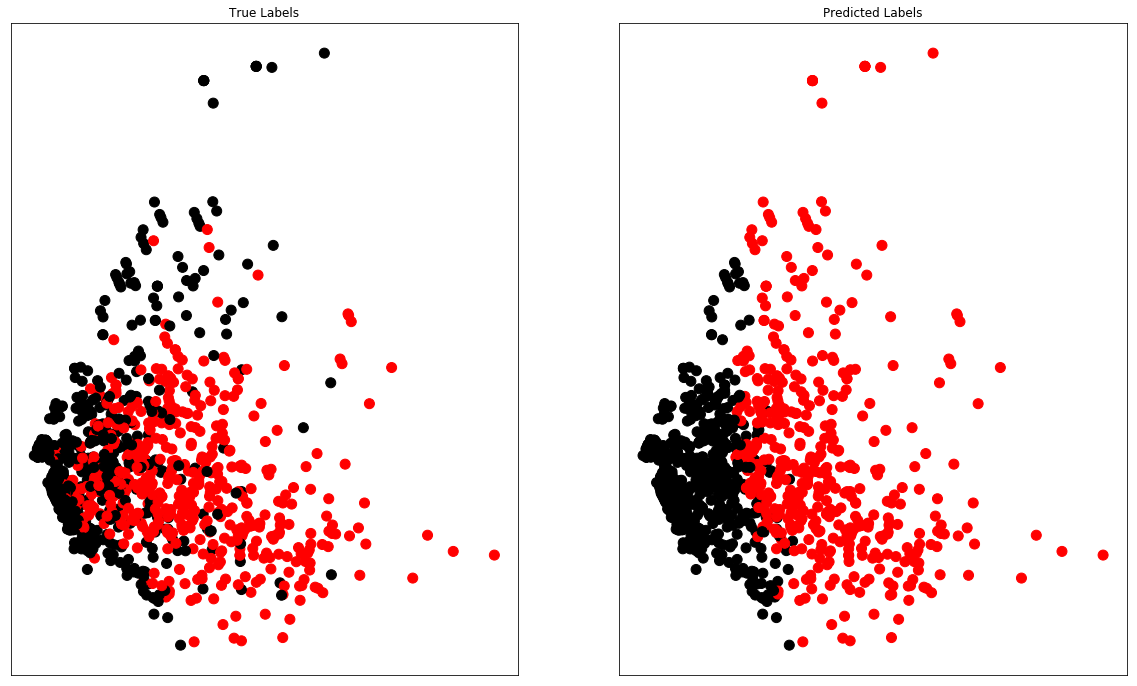

In [10]:
#Reducing dimensionality to 2-D
from sklearn.decomposition import PCA
pca = PCA()
reduced = pca.fit_transform(X)
plt.figure(figsize=(20, 12))

plt.subplot(1, 2, 1)
plt.title("True Labels")
plt.scatter(reduced[:, 0], reduced[:, 1], s=100, alpha=1, c=color1)
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.title("Predicted Labels")
plt.scatter(reduced[:, 0], reduced[:, 1], s=100, alpha=1, c=color2)
plt.xticks([])
plt.yticks([])
plt.show()

## As we can see, the K-means achieves about 82.5% accuracy with certain features excluded (corresponding to columns which are dropped). It's pretty good for the clustering algorithm, but it seems that the results depend on the initial random values of the centroids as shown below.

In [14]:
clf.fit(X, y)
acc, predictions2 = get_predictions(X, y)
predictions2 = np.array(predictions2)
predictions2 = predictions2.reshape(-1, )
print("Accuracy: {} %".format(acc*100))

Accuracy: 17.723453017570666 %


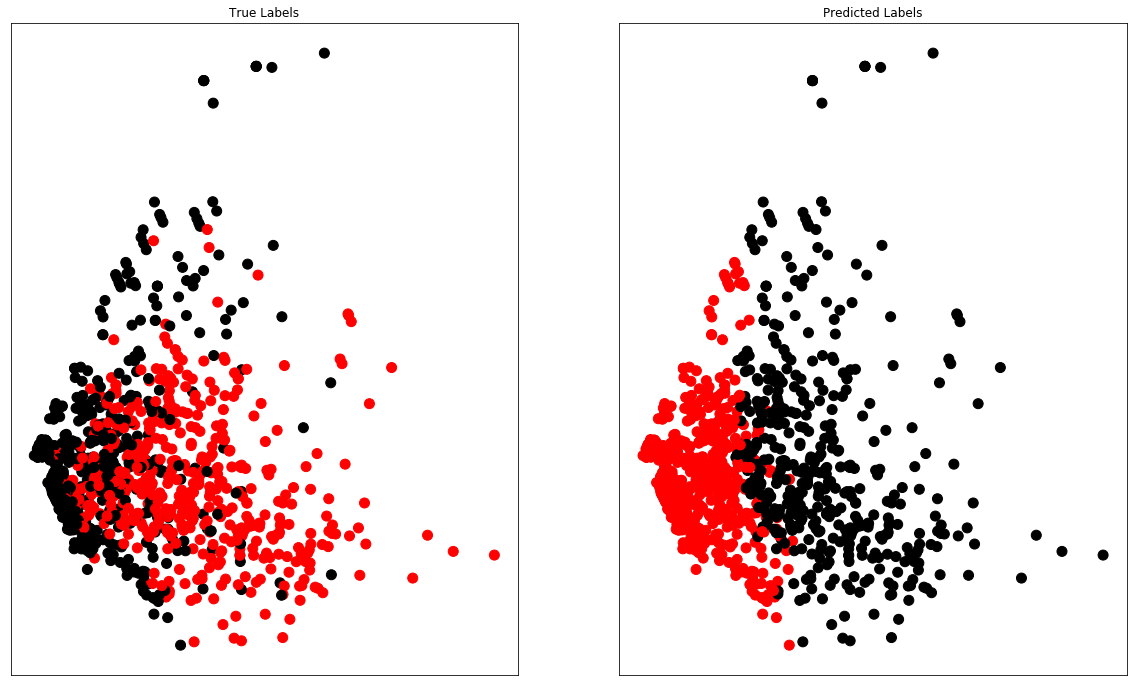

In [15]:
color1 = int_to_colour('r', 'k', y)
color2 = int_to_colour('r', 'k', predictions2)
reduced = pca.fit_transform(X)
plt.figure(figsize=(20, 12))

plt.subplot(1, 2, 1)
plt.title("True Labels")
plt.scatter(reduced[:, 0], reduced[:, 1], s=100, alpha=1, c=color1)
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.title("Predicted Labels")
plt.scatter(reduced[:, 0], reduced[:, 1], s=100, alpha=1, c=color2)
plt.xticks([])
plt.yticks([])
plt.show()

## So, the clusters are assigned rather arbitrarily i.e. they may or may not coincide with the correct cluster label.